# VC09 - Métodos de análisis de componentes



En esta clase vamos a ver cómo funciona el Análisis de Componentes Principales (PCA, de aquí en adelante).

### Implementando PCA desde 0

Para ello, vamos a implementar nosotros PCA de forma manual:

[[1 2]
 [3 4]
 [5 6]]


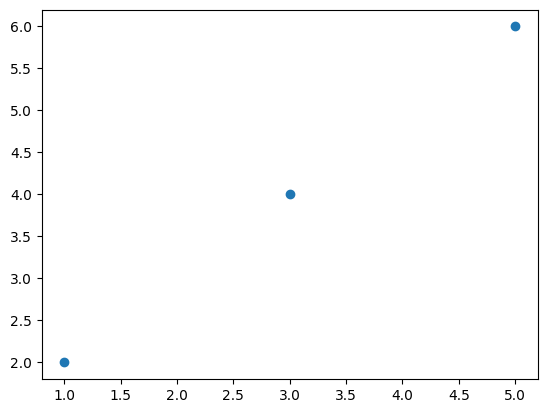

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import matplotlib.pyplot as plt

# definmos nuestros datos
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
plt.scatter(A[:, 0], A[:, 1])

In [2]:
# calculamos la media de cada columna (variable)
M = mean(A, axis=0)
print(M)

[3. 4.]


In [3]:
# centramos los datos restandoles la media (por variable)
C = A - M
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [4]:
# calculamos la covarianza de los datos centrados
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [5]:
# eigendecomposition de la matriz de covarianza
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


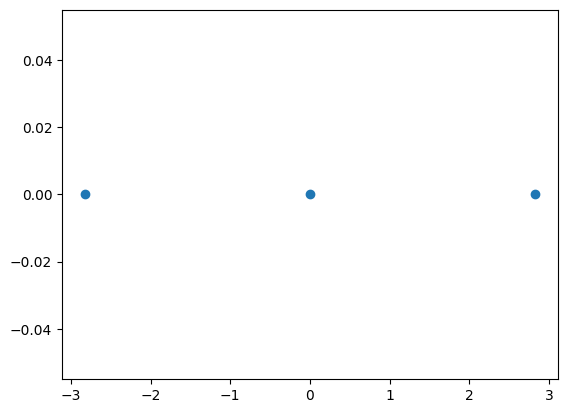

In [6]:
# proyectamos datos
P = C.dot(vectors)
print(P)
plt.scatter(P[:, 0], P[:, 1])

Ahora vamos a hacer lo mismo con las librerías de `scikit-learn`:

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


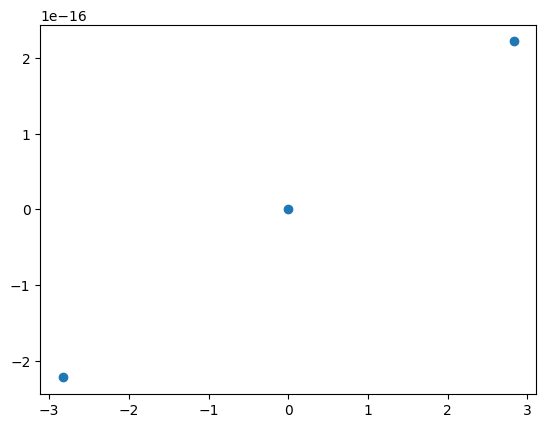

In [7]:
from numpy import array
from sklearn.decomposition import PCA

# instanciamos el algoritmo PCA
pca = PCA(2)

# lo ajustamos a los datos
pca.fit(A)

# mostramos las componentes principales calculadas y la varianza explicada
print(pca.components_)
print(pca.explained_variance_)

# transformamos los datos usando estas cimponentes
B = pca.transform(A)
print(B)

plt.scatter(B[:, 0], B[:, 1])

Tras haber visto lo sencillo que es el PCA, vamos a hacer un primer ejemplo muy sencillo.

### Ejemplo sencillo con `scikit-learn`

Empezamos importando las librerías necesarias y creándonos un dataset de juguete:

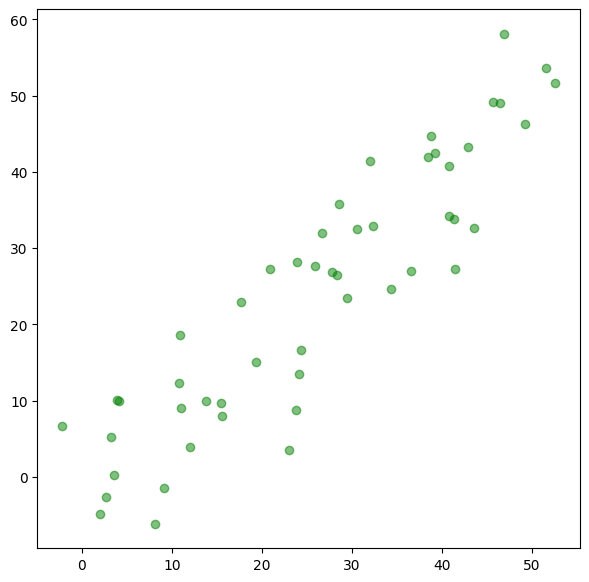

In [8]:
# importamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# nos creamos nuestro dataset aleatorio
X = np.zeros((50, 2))
X[:, 0] = np.linspace(0, 50)
X[:, 1] = X[:, 0]
X = X + 5*np.random.randn(X.shape[0], X.shape[1])

# lo mostramos
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:, 1], alpha=0.5, c='green')

Fijaos que los datos no están centrados ni tienen varianza 1. Hay que estandarizarlos:

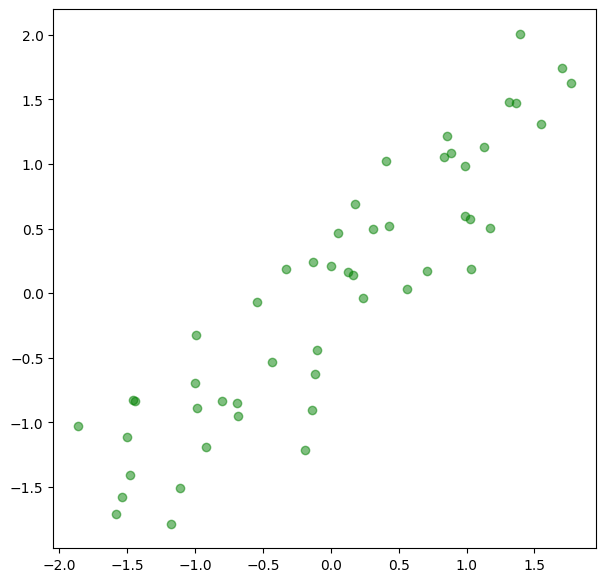

In [9]:
# estandarizamos los datos
from sklearn.preprocessing import StandardScaler

Xs = StandardScaler().fit_transform(X)

# los mostramos
plt.figure(figsize=(7, 7))
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')

Ahora podemos aplicar la PCA a nuestros datos:

In [12]:
# aplicamos la PCA para reducir las variables de 2 a 1
pca_reduce = PCA(1)
# proyectamos los datos en la nueva componente
X_proj = pca_reduce.fit_transform(Xs)
# los re-proyectamos en el espacio original usando solo 1 componente
X_rebuild = pca_reduce.inverse_transform(X_proj)
# esto lo vamos a necesitar para visualizar los ejes que tendríamos si n_componentes=2
pca = PCA(n_components=2)
_ = pca.fit_transform(Xs)

Visualizamos el resultado:

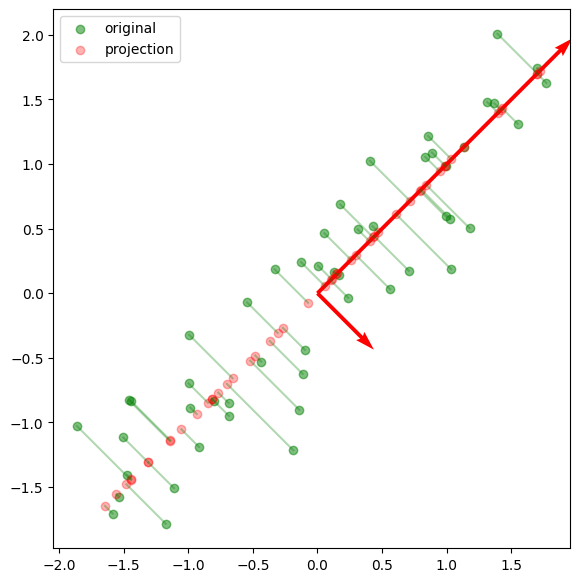

In [13]:
# para visualizarlo bonito
plt.figure(figsize=(7, 7))
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')
plt.scatter(X_rebuild[:, 0], X_rebuild[:, 1], alpha=0.3, c='r')

# plot the components
soa = np.hstack((
    np.ones(pca.components_.shape) * pca.mean_, 
    pca.components_ * np.atleast_2d(
        # components scaled to the length of their variance
        np.sqrt(pca.explained_variance_)
    ).transpose()
))
x, y, u, v = zip(*soa)

ax = plt.gca()
ax.quiver(
    x, y, u, v, 
    angles='xy', 
    scale_units='xy', 
    scale=0.5, 
    color='r'
)
plt.axis('scaled')
plt.draw()

plt.legend([
    'original', 
    'projection'
])

# plot the projection errors
for p_orig, p_proj in zip(Xs, X_rebuild):
    plt.plot([p_orig[0], p_proj[0]], [p_orig[1], p_proj[1]], c='g', alpha=0.3)
    
plt.show()

Aunque a primera vista PCA pueda parecer similar a la Regresión Lineal, no son lo mismo. Vamos a verlo con este ejemplo:

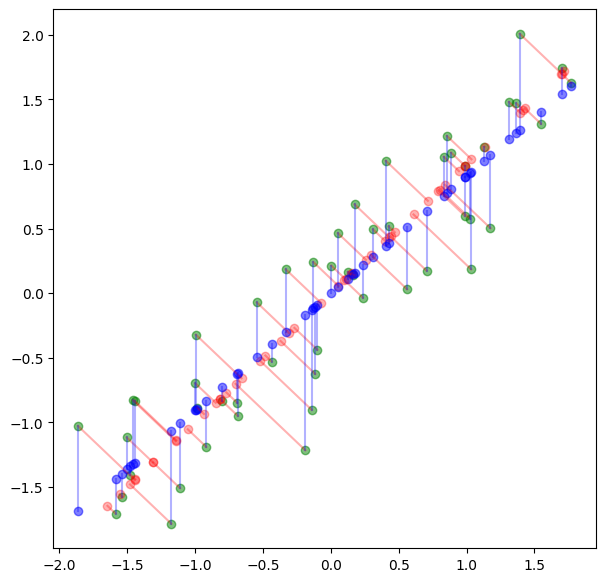

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xs[:,0].reshape(-1, 1), Xs[:, 1])
# coef_ son los coeficientes de regresión
y_pred = Xs[:,0] * lin_reg.coef_

plt.figure(figsize=(7, 7))

# mostramos los datos
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')
plt.scatter(X_rebuild[:, 0], X_rebuild[:, 1], alpha=0.3, c='r')
plt.scatter(Xs[:,0], y_pred, alpha=0.5, c='blue')

# mostramos los errores de proyection (PCA)
for p_orig, p_proj in zip(Xs, X_rebuild):
    plt.plot([p_orig[0], p_proj[0]], [p_orig[1], p_proj[1]], c='r', alpha=0.3)

# mostramos los errores de prediccion (LinearRegression)
for p_orig, y in zip(Xs, np.hstack((Xs[:,0].reshape(-1, 1), y_pred.reshape(-1, 1)))):
    plt.plot([p_orig[0], y[0]], [p_orig[1], y[1]], c='b', alpha=0.3)

Aquí podéis observar las diferencias entre ellas:

- PCA trata de minimizar el error de proyección de las muestras a nuestras nuevas "bases" en las que estamos representando los datos tras la proyección (lineas rojas).
- Regresión lineal trata de minimizar el error de predicción (lineas azules).

### Eigenfaces y PCA

En este ejemplo vamos a ver un caso de uso muy común de la PCA: la descomposición de caras en "caras base".

In [15]:
# Before using PCA, let us try and understand as well as display the original images 
from sklearn.datasets import fetch_olivetti_faces 
oliv=fetch_olivetti_faces() 
print(oliv.keys()) 
print (oliv.data.shape) #tells us there are 400 images that are 64 x 64 (4096) pixels each - See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.h4DDqQzH.dpuf

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


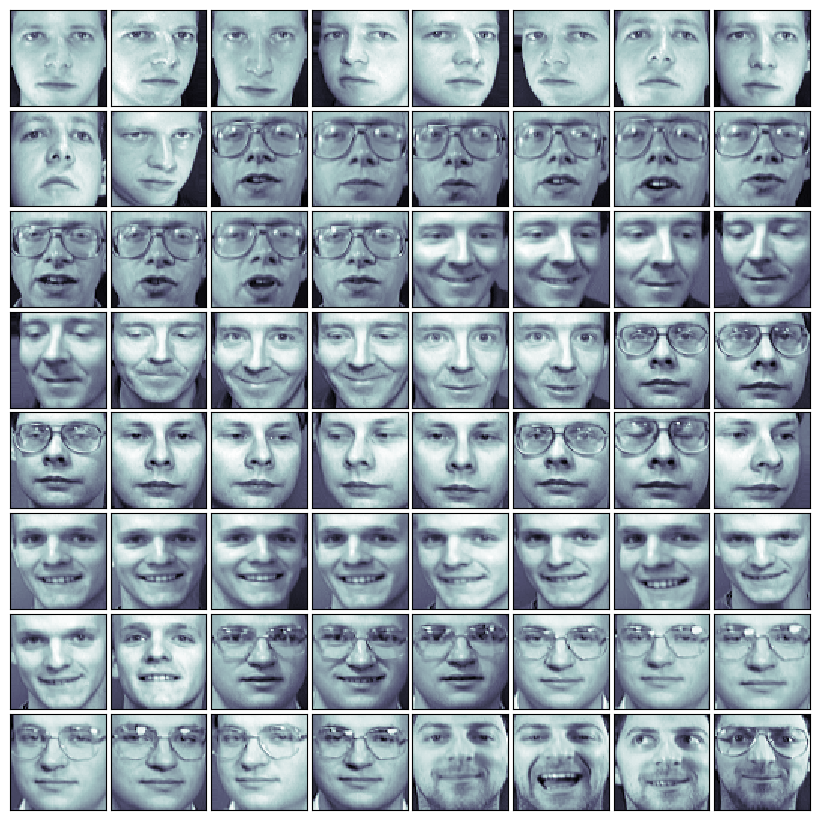

In [16]:
# visualizamos las caras
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# cada cara es de 64x64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

(400, 64)
[0.2381273  0.37806693 0.45775303 0.5077363  0.54383475 0.5754041
 0.59967244 0.6200364  0.63961756 0.65633875 0.672291   0.68666077
 0.69912815 0.7105995  0.72122824 0.73100543 0.74019605 0.7483518
 0.75589055 0.7633604  0.77034616 0.7764925  0.78233176 0.78802896
 0.7934908  0.79880935 0.8039475  0.8089059  0.8134825  0.81789434
 0.8219143  0.82575613 0.82937557 0.8327208  0.83592427 0.8390845
 0.84213525 0.8451212  0.847942   0.8506806  0.85327566 0.8558144
 0.85825557 0.8606519  0.8629583  0.8652188  0.8674388  0.86964
 0.8717227  0.873753   0.87571603 0.8776122  0.8794549  0.88122904
 0.88298726 0.88466054 0.8863201  0.8879225  0.88951665 0.8910731
 0.8925826  0.8940462  0.89548904 0.8969126 ]


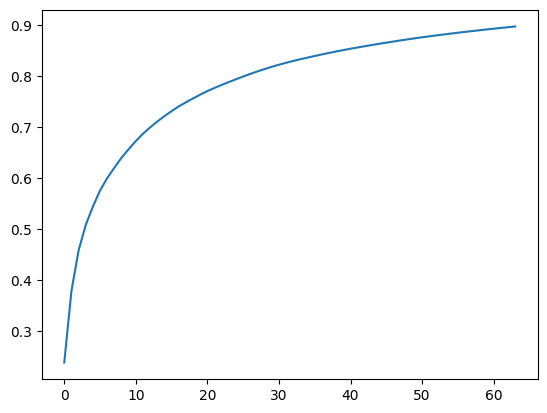

In [17]:
# veamos cuanta de la varianza explicada tendríamos al comprimir las imágenes a 8x8 (64 pixels)
X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)
cumvar = np.cumsum(pca_oliv.explained_variance_ratio_)
print(cumvar)
plt.plot(cumvar)

Fijaos que hemos conseguido retener el 89.7% de la varianza explicada después de haber comprimido las 4096 dimensiones del dataset original a 64, haciendo uso de las primeras 64 componentes principales.

Cada una de estas componentes principales explica cierta cantidad de varianza del dataset original. El parámetro components_ del estimador nos da las componentes con máxima varianza explicada

In [18]:
print(pca_oliv.components_.shape)

(64, 4096)


Vamos a visualizar nuestro dataset reducido a 64 componentes. Fijaos que lo que estamos viendo NO es una reconstrucción del dataset original, sino las componentes principales o "bases" de nuestros datos reducidos. Las componentes principales son vectores de longitud igual al número de características original (4096), así que lo reshapeamos a 64x64.

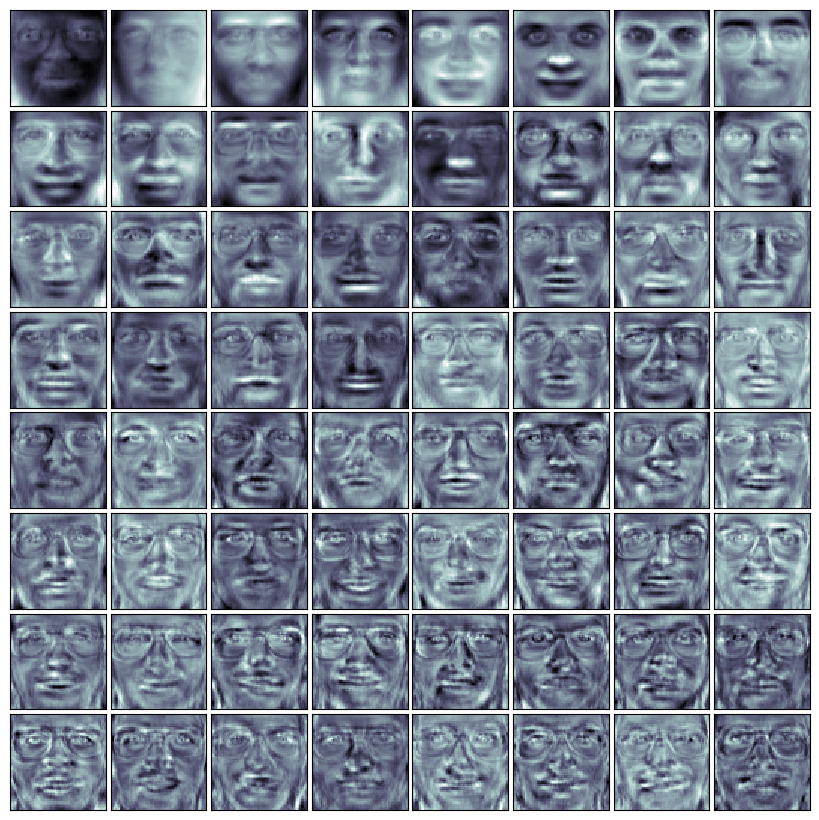

In [19]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostramos las caras base
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

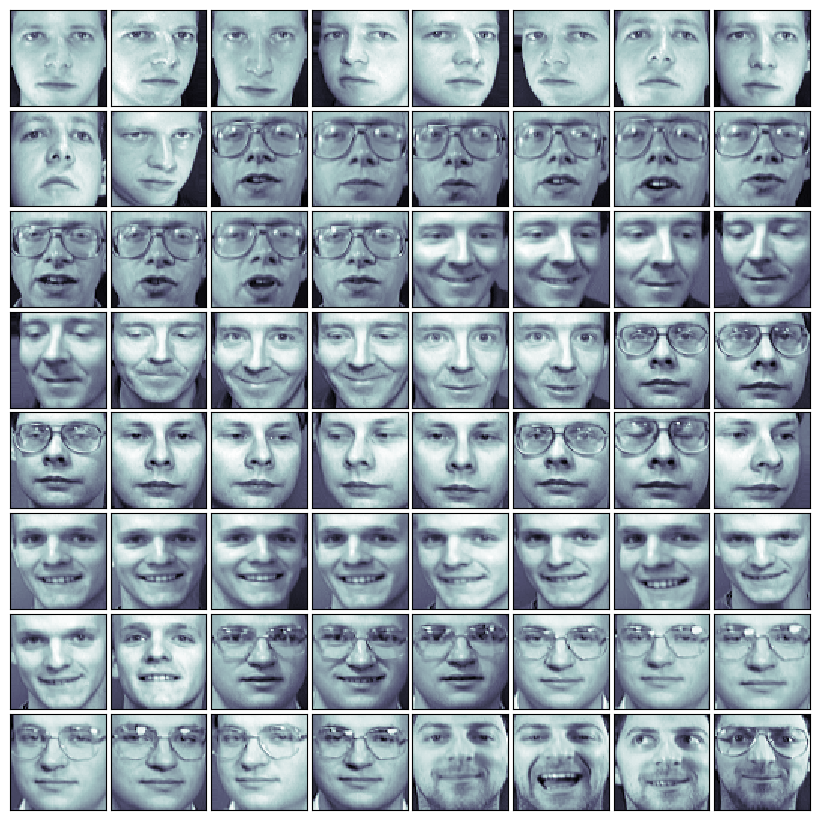

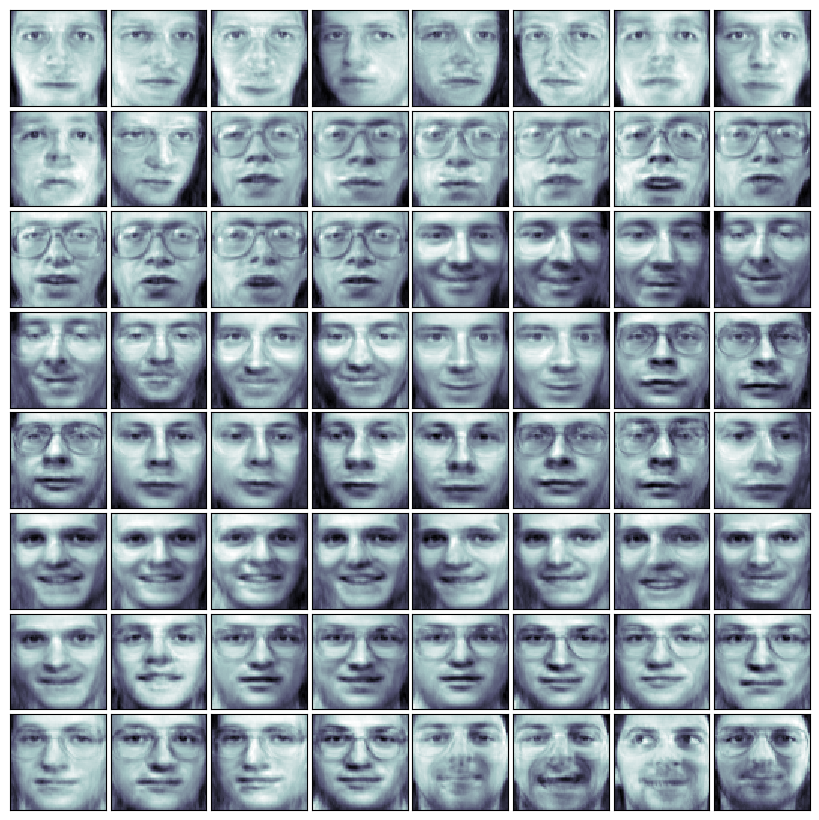

In [20]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
# reshapeamos como 400 imagenes de 64x64 dimensiones
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

# visualizamos las caras originales
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

# mostramos las caras reconstruidas
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

Nada mal, no os parece?!

FUENTES:
- https://machinelearningmedium.com/2018/04/22/principal-component-analysis/
- https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
- https://shankarmsy.github.io/posts/pca-sklearn.html

RECURSOS:

- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- https://medium.com/@kyasar.mail/pca-principal-component-analysis-729068e28ec8
- http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html (básico)
- https://sebastianraschka.com/Articles/2014_pca_step_by_step.html (avanzado)